In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#initalisation of parameters
sig_ep = 1 # sigma of epsilon (noise standard error)
sig_beta = 10
N = 5 # number of samples
d = 2 # dimension of beta
Beta_star = sig_beta*np.random.randn(d) #real value of Beta

In [3]:
# First part: generation of samples
# funtion for generating N samples
def generate_samples(sig_ep, N, d, Beta):
    X = np.random.randn(N, d, d)
    #X = np.vstack((X, np.ones((2, d, d))))
    #X = np.ones((N, d, d))
    Y = np.dot(X,Beta) + sig_ep*np.random.randn(N, d)
    return(X,Y)

# Obtained Samples
[X, Y] = generate_samples(sig_ep, N, d,Beta_star)

In [4]:
# second part: calculate Beta from samples
def calculate_posterior_beta(X, Y, d, N):
    X = np.reshape(X, (N*d, d))
    A = np.vstack((np.hstack((np.identity(N*d),X)),np.hstack((np.zeros([d,N*d]),np.identity(d)))))
    A = np.mat(A)

    SIG_ep_Beta = np.zeros((N * d + d, N * d + d))
    SIG_ep_Beta[0:N * d][:,0:N * d] = sig_ep*np.identity(N*d)
    SIG_ep_Beta[N * d:][:,N * d:N * d + d] = sig_beta*np.identity(d)
    
    
    SIG_Y_Beta = A*np.mat(SIG_ep_Beta)*np.transpose(A)
        
    SIG_Y = SIG_Y_Beta[0:N * d][:,0:N * d]
        
    SIG_beta = SIG_Y_Beta[N * d:SIG_Y_Beta.shape[0]][:,N * d:SIG_Y_Beta.shape[1]]
    
    SIG_Y_beta = SIG_Y_Beta[0:N * d][:,N * d:SIG_Y_Beta.shape[1]]
    
    SIG_beta_Y = SIG_Y_Beta[N * d:SIG_Y_Beta.shape[0]][:,0:N * d]
    
    
    posteriorMeanBeta = 0 + np.dot(np.dot(SIG_beta_Y, np.linalg.inv(SIG_Y)), Y.reshape(N * d))
    posteriorMeanBeta = np.array(posteriorMeanBeta).reshape(-1)

    posteriorCovBeta = SIG_beta - np.dot(SIG_beta_Y, np.dot(np.linalg.inv(SIG_Y), SIG_Y_beta))
    
    return posteriorMeanBeta, posteriorCovBeta

In [89]:
#initalisation of parameters
sig_ep = 1 # sigma of epsilon (noise standard error) # careful if changed
sig_beta = 10
N = 5 # number of samples
d = 2 # dimension of beta
Beta_star = sig_beta*np.random.randn(d) #real value of Beta

In [90]:
# First part: generation of samples
# funtion for generating N samples
def generate_samples(sig_ep, N, d, Beta):
    X = np.random.randn(N, d)
    #X = np.vstack((X, np.ones((2, d, d))))
    #X = np.ones((N, d, d))
    Y = np.dot(X,Beta) + sig_ep*np.random.randn(N)
    return(X,Y)

# Obtained Samples
[X, Y] = generate_samples(sig_ep, N, d,Beta_star)

In [100]:
# second part: calculate Beta from samples
def calculate_posterior_beta(X, Y, d, N):
    
    A = np.hstack((np.vstack((np.identity(N),np.zeros((d, N)))),np.vstack((X,np.identity(d)))))
    A = np.mat(A)

    SIG_0 = np.identity(N + d) # we suppose Var(eps)=1 and Var(B) = Id 
    
    
    SIG = A*np.mat(SIG_0)*np.transpose(A)
        
    SIG_Y = SIG[0:N ][:,0:N]
        
    SIG_beta = SIG[N :SIG.shape[0]][:,N:SIG.shape[1]]
    
    SIG_Y_beta = SIG[0:N][:,N:SIG.shape[1]]
    
    SIG_beta_Y = SIG[N:SIG.shape[0]][:,0:N]
    
    
    posteriorMeanBeta = 0 + np.dot(np.dot(SIG_beta_Y, np.linalg.inv(SIG_Y)), Y)

    posteriorCovBeta = SIG_beta - np.dot(SIG_beta_Y, np.dot(np.linalg.inv(SIG_Y), SIG_Y_beta))
    
    return np.array(posteriorMeanBeta).reshape(-1), posteriorCovBeta

In [101]:
posteriorMeanBeta, posteriorCovBeta = calculate_posterior_beta(X, Y, d, N)

## Concentration pour la convergence presque sur

In [104]:
def check_concentration(speed, N_samples_for_estimation, n, d, sig_ep, sig_beta, step=30, number_of_trials_per_step=10):
    df = pd.DataFrame(columns=["n", "proba"])
    Beta_star = sig_beta*np.random.randn(d) #real value of Beta
    for trial in range(number_of_trials_per_step):
        for i in range(3, n, step): # begins at 3 because we remove 2 lines
            [X, Y] = generate_samples(sig_ep, i, d,Beta_star)
            posteriorMeanBeta, posteriorCovBeta = calculate_posterior_beta(X, Y, d, i)
            count_inside_ball = 0
            for k in range(N_samples_for_estimation):
                count_inside_ball += np.linalg.norm(np.random.multivariate_normal(posteriorMeanBeta, posteriorCovBeta) - Beta_star)< 1 / speed(i)
            df2 = pd.DataFrame([[i, count_inside_ball / N_samples_for_estimation]],columns=['n', 'proba'])
            df = pd.concat([df,df2])
    sns.barplot(x='n', y="proba", data = df)

/Users/anne/anaconda/envs/modal/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


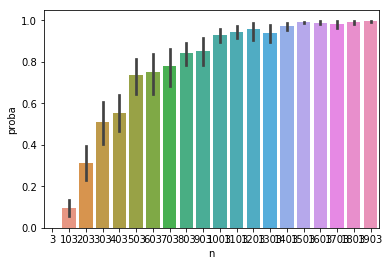

In [108]:
step = 100
n = 2000
N_samples_for_estimation = 30
number_of_trials_per_step = 20
check_concentration(lambda x:np.log(x), 1000, n=n, d=5, sig_ep=1, sig_beta=10, step=step, number_of_trials_per_step=number_of_trials_per_step);

/Users/anne/anaconda/envs/modal/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


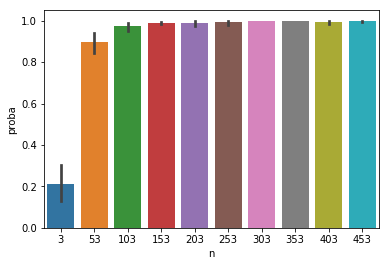

In [53]:
step = 50
n = 500
N_samples_for_estimation = 1000
number_of_trials_per_step = 10
check_concentration(lambda x:np.exp(np.log(x)/3), 1000, n=n, d=5, sig_ep=1, sig_beta=10, step=step, number_of_trials_per_step=10);

In [ ]:
step = 50
n = 500
N_samples_for_estimation = 1000
number_of_trials_per_step = 10
check_concentration(np.sqrt, 1000, n=n, d=5, sig_ep=1, sig_beta=10, step=step, number_of_trials_per_step=10);

In [ ]:
step = 50
n = 500
N_samples_for_estimation = 1000
number_of_trials_per_step = 10
check_concentration(lambda x:np.exp(2 * np.log(x)/3), 1000, n=n, d=5, sig_ep=1, sig_beta=10, step=step, number_of_trials_per_step=10);

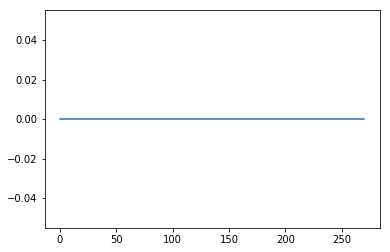

In [11]:
step = 50
n = 500
plt.plot([30 * i for i in range(n // step)], check_concentration(lambda x:x, 1000, n=n, d=5, sig_ep=1, sig_beta=10, step=step))

In [14]:
def plot_ball(speed, N_samples_for_estimation, n, d, sig_ep, sig_beta):
    Beta_star = sig_beta*np.random.randn(d) #real value of Beta
    [X, Y] = generate_samples(sig_ep, n, d,Beta_star)
    
    posteriorMeanBeta, posteriorCovBeta = calculate_posterior_beta(X, Y, d, n)
    
    ax=plt.subplot(aspect='equal')
    plt.scatter(Beta_star[0], Beta_star[1], c="red")
    for i in range(N_samples_for_estimation):
        sample = np.random.multivariate_normal(posteriorMeanBeta, posteriorCovBeta)
        plt.scatter(sample[0], sample[1], c="blue")
    circle = plt.Circle(Beta_star, 1/speed(n), fill=False)
    ax.add_artist(circle)

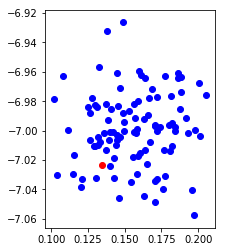

In [17]:
plot_ball(np.log, 100, 1000, 2, 1, 10)

## Concentration pour la convergence en proba

/Users/anne/anaconda/envs/modal/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


199


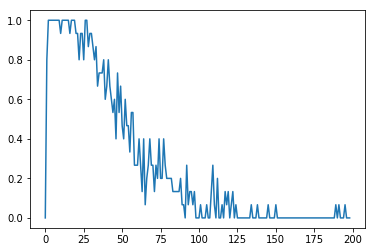

In [595]:
plt.plot(check_concentration_proba_convergence(np.log, 15, 100, 200, 5, 1, 10, 0.1))

In [1]:
import pystan

ModuleNotFoundError: No module named 'pystan'

In [6]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

AttributeError: module 'pystan' has no attribute 'StanModel'

In [22]:
import sys

In [24]:
sys.version

'3.7.0 (default, Jun 28 2018, 07:39:16) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'